<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S13/EVA4_S13_Solution_YoloOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Initialization

In [0]:
import cv2
import numpy as np

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-25 17:38:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   588KB/s    in 6m 26s  

2020-04-25 17:44:27 (628 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Load Yolo

- Weight file: it’s the trained model, the core of the algorithm to detect the objects.
- Cfg file: it’s the configuration file, where there are all the settings of the algorithm.
- Name files: contains the name of the objects that the algorithm can detect.

In [0]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Load image for detection

In [0]:
img = cv2.imread("object_detection_test_img.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

## Detecting objects

YOLO accepts three sizes:

- 320×320 it’s small so less accuracy but better speed
- 609×609 it’s bigger so high accuracy and slow speed
- 416×416 it’s in the middle and you get a bit of both.

In [0]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

### Detect the bounding boxes

In [0]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

### Use Non maximum suppresion to choose the best bounding boxes

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Display the result

- Box: contain the coordinates of the rectangle sorrounding the object detected.
- Label: it’s the name of the object detected
- Confidence: the confidence about the detection from 0 to 1.

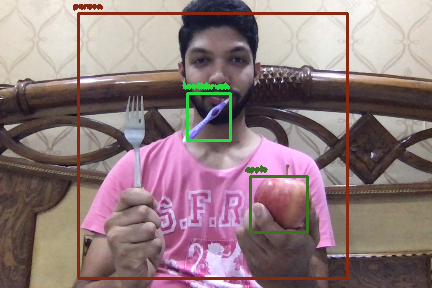

In [8]:
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x - 5, y - 5), font, 0.5, color, 2)
cv2_imshow(img)

In [9]:
cv2.imwrite("detected_img.jpg", img)

True